# SVM Lineal

$$\frac{1}{n}\sum_{i=1}^n \max(0,1-y_i(Ax_i-b))+\alpha||A||^2$$

- $A$: es el vector de las pendientes en cada variable 
- $b$: es la ordenada en el origen (intercept)
- $x=(x_1,x_2,\cdots, x_n)$ es el vector de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regularización y suavizado de la separación

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [3]:
session = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [8]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [9]:
batch_size = 100

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [10]:
model_output = tf.subtract(tf.matmul(x_data,A), b)

In [11]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [12]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [13]:
my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [14]:
loss_vect = []
train_acc = []
test_acc = []

for i in range(600):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict= {x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+", b = "+str(session.run(b))+ ", Loss = "+str(temp_loss))

Paso #100, A = [[-0.1300334]
 [-0.1292618]], b = [[-0.01540361]], Loss = [0.6597337]
Paso #200, A = [[-0.07231094]
 [-0.39194775]], b = [[-0.0747036]], Loss = [0.6180989]
Paso #300, A = [[-0.03349137]
 [-0.59890556]], b = [[-0.13550359]], Loss = [0.5031571]
Paso #400, A = [[ 0.01511916]
 [-0.7661489 ]], b = [[-0.20290358]], Loss = [0.5692105]
Paso #500, A = [[ 0.04887026]
 [-0.8983221 ]], b = [[-0.2675036]], Loss = [0.4349648]
Paso #600, A = [[ 0.03823711]
 [-1.0262365 ]], b = [[-0.3273036]], Loss = [0.41919467]


In [16]:
[[a1],[a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2/a1
y_intercept = b/a1


x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==-1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==-1] 

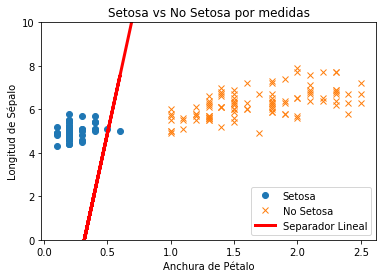

In [22]:
plt.plot(setosa_x, setosa_y, 'o', label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, 'x', label="No Setosa")
plt.plot(x1_vals, best_fit, 'r-', label = "Separador Lineal", linewidth=3)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.show()

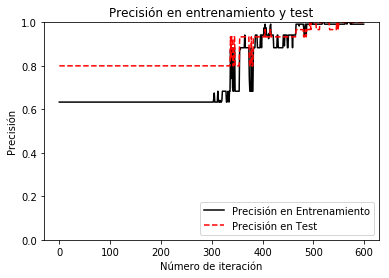

In [24]:
plt.plot(train_acc, 'k-', label = "Precisión en Entrenamiento")
plt.plot(test_acc, 'r--', label = "Precisión en Test")
plt.title("Precisión en entrenamiento y test")
plt.xlabel("Número de iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.ylim([0,1])
plt.show()

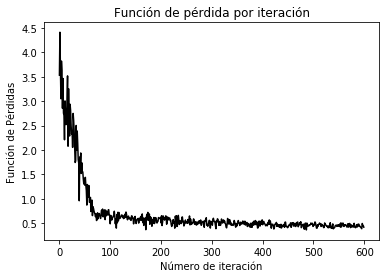

In [25]:
plt.plot(loss_vect, 'k-')
plt.title("Función de pérdida por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas")
plt.show()